# CS 229 - PS 1: Problem 5


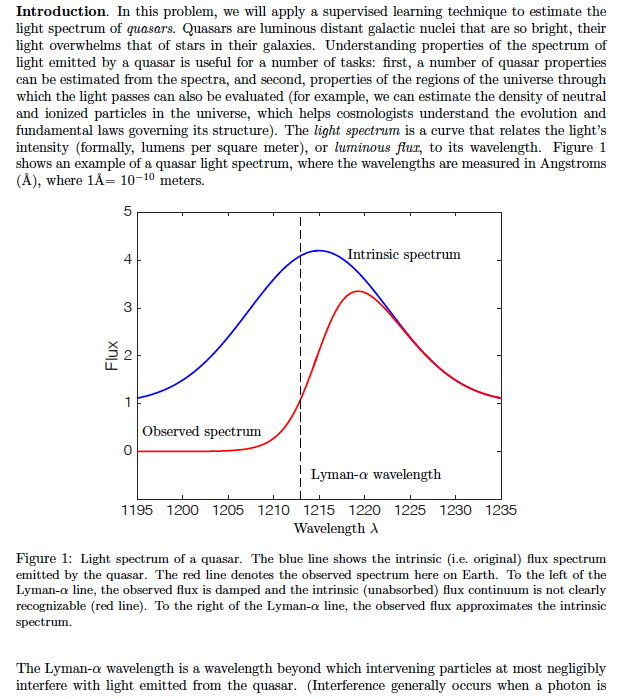

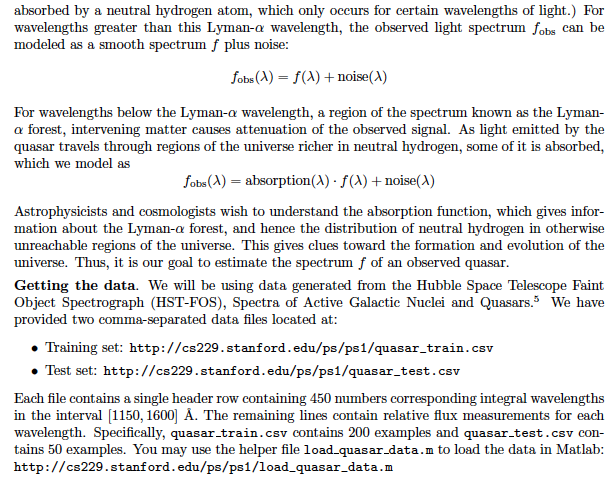

## Part (a)

*Part (a) essentially asks us to show that it can be written as follows and to derive the analytical solution to locally weighted linear regression. My solution is as follows:*

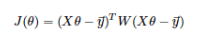

In [25]:
# imports
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

## Part (b)

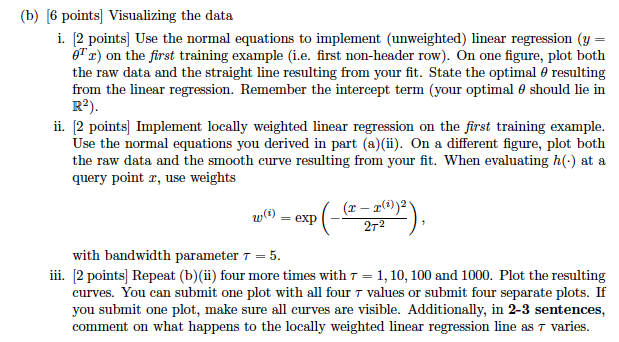

In [3]:
#load data
data = pd.read_csv('quasar_train.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
1,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
2,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
3,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
4,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.541,1.128,0.309,1.549,2.142,0.573,0.861,-0.064,0.946,0.827,...,2.455,0.949,1.463,0.870,1.053,1.211,1.230,0.865,0.792,0.635
197,1.237,0.712,1.407,1.155,-0.538,-1.360,2.321,1.598,1.449,1.684,...,1.029,1.205,1.121,1.341,1.769,0.701,0.635,0.723,0.622,0.348
198,0.212,0.102,0.452,2.887,3.236,0.674,-1.290,0.954,0.795,0.976,...,1.053,1.517,1.491,1.546,0.777,0.469,1.949,1.018,0.671,0.538
199,0.193,1.063,0.292,0.699,-1.152,1.738,1.987,1.434,3.078,0.784,...,0.907,1.004,0.427,1.216,1.216,1.962,1.421,0.612,0.847,1.000


**In this case**, our x is the flux and y is the corresponding wavelength given in the first row

In [10]:
n=450

In [34]:
data_nump = data.to_numpy()
x = data_nump[0] #select first row
x = np.expand_dims(x,1) 
i = np.ones((450,1)) #add col of 1's to it 
x = np.concatenate((i,x),1)
#x 

In [35]:
y = data_nump[1]

### Analytic Solution to Unweighted Linear Regression


In [36]:
xt = np.transpose(x)
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(xt,x)),xt),y)
theta

array([ 2.51339906e+00, -9.81122145e-04])

### Plot of Unweighted Linear Regression Solution and Data

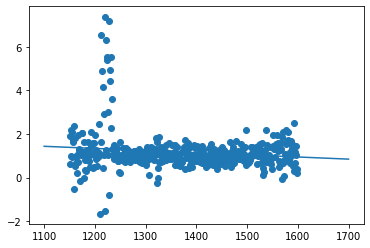

In [46]:
#plot line 
xvals = np.arange(1100,1700,0.01)
yvals = xvals*(theta[1]) + theta[0] #linear equation with parameters found
plt.scatter(xt[1],y)
plt.plot(xvals, yvals)
plt.show()

### Analytic Solution to Weighted Linear Regression
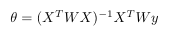 where

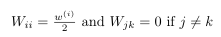

and 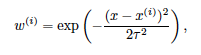

### Steps:
1. For each x in range that I want to draw curve for, compute theta 
    a. Compute W and then, solve for theta 
2. Use theta to predict y 

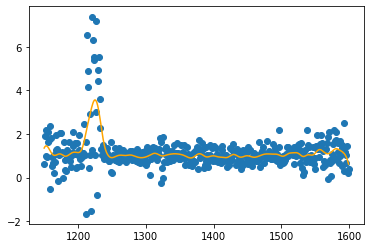

In [114]:
#Clean this up

tau = 5 #change me
xvals = np.arange(1150,1600,1)
yvals = []
for row in range(xvals.shape[0]):
    yvals.append(calc_y(xvals[row],tau))

plt.scatter(xt[1],y)
plt.plot(xvals, yvals,color='orange')
plt.show()

In [117]:
#Calculate y for an x
def calc_y(x_,tau,y=y):
    t = calc_theta(x_,tau,y)
    return np.dot(t,np.array([1,x_]))
    

In [118]:
#Calculates theta
def calc_theta(x_,tau,y=y):
    w = calc_w(x_,tau)
    a = np.linalg.inv(np.matmul(np.matmul(xt,w),x))
    b = np.matmul(xt,np.matmul(w,y))
    return np.matmul(a,b)

In [107]:
#Calculate W
def calc_weight(x_,tau,x_i):
    return math.exp((-1*((x_-x_i)**2))/(2*(tau**2)))
def calc_w(x_,tau):
    w_ = np.zeros((n,n))
    for i in range(n):
        w_[i][i] = calc_weight(x_,tau,x[i][1])/2 
    return w_
    

## Part (c)
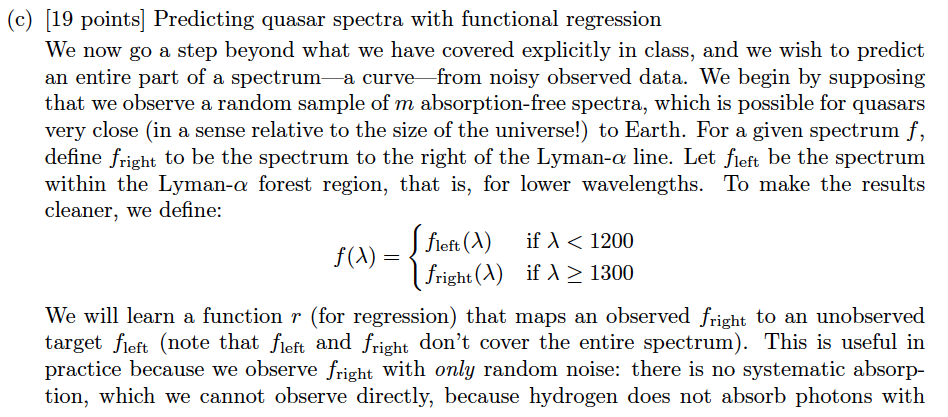

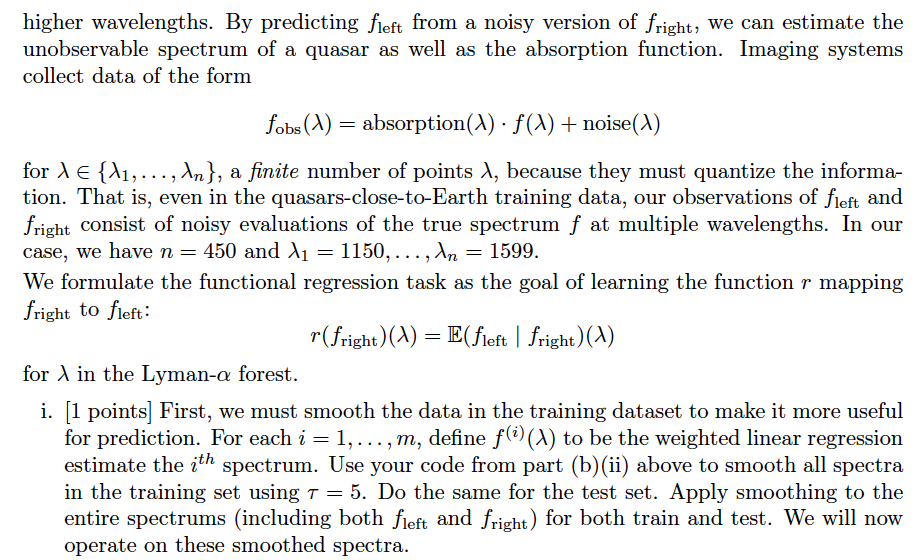

### Steps
1. Go through each row of flux values
2. For each, calculate the estimate at the x value based on weighted linear regression with $\tau = 5$ 
3. Do this for both the train & test set

In [122]:
smooth_train = np.zeros((data_nump.shape[0]-1,n))
for row in range(1,data_nump.shape[0]):
    tau = 5 
    for i in range(n):
        smooth_train[row-1][i] = calc_y(x[i][1],tau,data_nump[row])
smooth_train

array([[ 1.35457751,  1.411428  ,  1.44418291, ...,  0.83468706,
         0.73537353,  0.61880777],
       [ 0.8630299 ,  0.93499234,  0.98748083, ...,  0.88094242,
         0.7530859 ,  0.58686922],
       [-0.54199083, -0.3879195 , -0.23759803, ...,  1.1474556 ,
         1.18788252,  1.22661737],
       ...,
       [ 0.84491185,  0.91335579,  0.94612793, ...,  0.96263275,
         0.89165294,  0.80694689],
       [ 0.2365519 ,  0.40504492,  0.5759311 , ...,  1.06663278,
         1.0357148 ,  0.99772697],
       [ 1.25215608,  1.21257714,  1.15577569, ...,  0.59479467,
         0.37155891,  0.09915474]])

In [129]:
data = pd.read_csv('quasar_test.csv', header = None)
test_nump = data.to_numpy()


In [130]:
smooth_test = np.zeros((test_nump.shape[0]-1,n))
for row in range(1,test_nump.shape[0]):
    tau = 5 
    for i in range(n):
        smooth_train[row-1][i] = calc_y(x[i][1],tau,test_nump[row])
smooth_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
smooth_test.shape

(50, 450)

### C.ii)
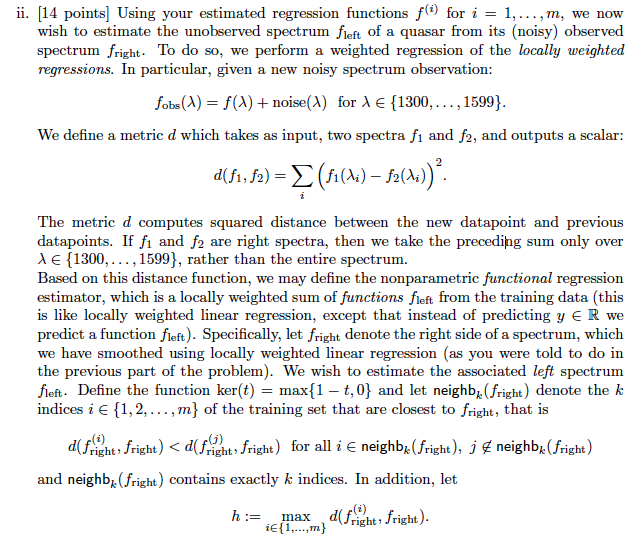

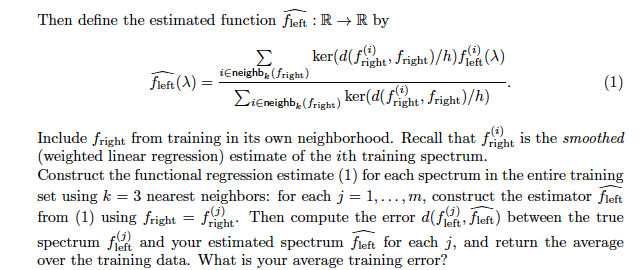

### Steps
1. Define the relevant functions
2. Split data into right and left
3. Construct estimates f_left^ using f_right^ and of size f_left
4. Compute average error between estimated f_left^ and actual f_left


In [132]:
def d(f1,f2,right=True):
    s = 0
    k = 1300 if right else 1100 #if f_right, 1300-1599 only
    for i in range(1600-k):
        s+= (f1[i]-f2[i])**2
    return s 

In [133]:
def ker(t): 
    return np.maximium(1-t,0)

In [142]:
#k nearest neighbors to f & h 
def neighb(f_right,f,k=3):
    ds = []
    for i in range(n):
        ds.append(d(f_right,f[i])) #add all distancs
    ds = np.array(ds)
    nn = []
    h = np.argmax(ds) #max of all 
    for i in range(k):
        new_n = np.argmax(ds) #max 
        nn.append(new_n) #add the index to list
        ds = np.delete(ds,new_n) #drop new_nth entry in ds
    return (np.array(nn),h)  

*If you are wondering where the rest of this problem's solution is, I think that I have run out of interest. I regret to not complete it, but if this were a real problem set, I think I would be mostly satisfied with the grade it gets me.*

**I may come back and finish this for clarity**